# Library Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Loading Data

In [2]:
df = pd.read_csv('/Users/hassan/Desktop/IE/Term 3/Capstone/Dataset/Codes/All_data_hourly.csv')
df.head()

,Date,mains,television,fan,fridge,laptop computer,electric heating element,oven,unknown,washing machine,microwave,toaster,sockets,cooker
0,2015-07-05 00:00:00,143.004315,0.0,29.65,46.212032,28.572644,3.308484,0.0,0.0,0.68,1.24,0.0,3.662270,0.0
1,2015-07-05 01:00:00,137.715056,0.0,29.65,67.477149,6.903596,3.567010,0.0,0.0,0.68,1.24,0.0,1.215315,0.0
2,2015-07-05 02:00:00,96.905917,0.0,29.65,27.872019,7.256528,3.493292,0.0,0.0,0.68,1.24,0.0,0.623556,0.0
3,2015-07-05 03:00:00,158.304917,0.0,29.65,87.796758,7.203779,3.180235,0.0,0.0,0.68,1.24,0.0,0.710871,0.0
4,2015-07-05 04:00:00,81.829944,0.0,29.65,13.002829,6.871206,2.550000,0.0,0.0,0.68,1.24,0.0,0.757274,0.0


# EDA

### Data Descrebbtion

In [3]:
df.describe().round(1)

print('\n Data shape:')
display(df.shape)

print('\n Data Descreption:')
display(df.describe().round(1))


 Data shape:


(3695, 14)


 Data Descreption:


,mains,television,fan,fridge,laptop computer,electric heating element,oven,unknown,washing machine,microwave,toaster,sockets,cooker
count,3685.0,3695.0,3695.0,3695.0,3695.0,3695.0,3695.0,3695.0,3695.0,3695.0,3695.0,3695.0,3695.0
mean,110.7,3.4,1.3,33.0,8.2,11.8,2.1,0.2,4.0,4.7,0.9,2.0,8.6
std,81.9,11.4,5.6,13.1,11.0,11.8,22.3,2.1,29.9,17.5,12.7,11.2,47.1
min,31.9,0.0,0.0,0.0,0.0,2.3,0.0,0.0,0.7,1.0,0.0,0.0,0.0
25%,68.9,0.0,0.0,25.7,0.0,3.6,0.0,0.0,0.7,1.2,0.0,0.0,0.0
50%,88.1,0.0,0.0,31.8,1.3,4.2,0.0,0.0,0.7,1.2,0.0,1.2,0.0
75%,119.1,0.0,0.0,40.3,14.3,20.5,0.0,0.0,1.0,1.2,0.0,2.0,0.0
max,1183.4,63.1,36.3,91.8,58.4,68.2,594.4,53.5,572.2,459.6,567.6,504.7,523.9


### Data Types

In [4]:
# Data Type
df.dtypes

Date                         object
mains                       float64
television                  float64
fan                         float64
fridge                      float64
laptop computer             float64
electric heating element    float64
oven                        float64
unknown                     float64
washing machine             float64
microwave                   float64
toaster                     float64
sockets                     float64
cooker                      float64
dtype: object

In [5]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dtypes

Date                        datetime64[ns]
mains                              float64
television                         float64
fan                                float64
fridge                             float64
laptop computer                    float64
electric heating element           float64
oven                               float64
unknown                            float64
washing machine                    float64
microwave                          float64
toaster                            float64
sockets                            float64
cooker                             float64
dtype: object

### Feature Engineering

In [50]:
df['Date_only'] = df['Date'].dt.date

# Extract the day as its name from the 'datetime' column and create a new 'day' column
df['month'] = df['Date'].dt.month_name()

# Define the order of the months explicitly
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'month_name' to a categorical type with a defined order
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

# Extract the day as its name from the 'datetime' column and create a new 'day' column
df['day'] = df['Date'].dt.day_name()

# Define the order of the days explicitly
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'day' column to categorical type with a defined order
df['day'] = pd.Categorical(df['day'], categories=days_order, ordered=True)

# Extract the hour from the 'datetime' column and create a new 'hour' column
df['hour'] = df['Date'].dt.hour

# Extract the hour from the 'datetime' column and create a new 'minute' column
df['minute'] = df['Date'].dt.minute

# Define time intervals for Morning, Afternoon, Evening, Night
time_intervals = [0, 6, 12, 18, 24]
time_labels = ['Night', 'Morning', 'Afternoon', 'Evening']

# Create a new column 'time_of_day'
df['time_of_day'] = pd.cut(df['hour'], bins=time_intervals, labels=time_labels, include_lowest=True, right=False)



In [7]:
df.head(2)

,Date,mains,television,fan,fridge,laptop computer,electric heating element,oven,unknown,washing machine,microwave,toaster,sockets,cooker,month,day,hour,minute,time_of_day
0,2015-07-05 00:00:00,143.004315,0.0,29.65,46.212032,28.572644,3.308484,0.0,0.0,0.68,1.24,0.0,3.662270,0.0,July,Sunday,0,0,Night
1,2015-07-05 01:00:00,137.715056,0.0,29.65,67.477149,6.903596,3.567010,0.0,0.0,0.68,1.24,0.0,1.215315,0.0,July,Sunday,1,0,Night


### Null Values

In [8]:
# Null Values
df.isnull().sum()

Date                         0
mains                       10
television                   0
fan                          0
fridge                       0
laptop computer              0
electric heating element     0
oven                         0
unknown                      0
washing machine              0
microwave                    0
toaster                      0
sockets                      0
cooker                       0
month                        0
day                          0
hour                         0
minute                       0
time_of_day                  0
dtype: int64

In [9]:
# Find the minimum and maximum date
min_date = df['Date'].min()
max_date = df['Date'].max()

print(f"The range of dates is from {min_date} to {max_date}.")

The range of dates is from 2015-07-05 00:00:00 to 2015-12-05 22:00:00.


### Duplicates

In [10]:
print('\n\nDuplicates Rows:',df.duplicated().sum())



Duplicates Rows: 0


### Data Distribution

In [11]:
# Get list of numeric/categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()

/Users/hassan/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


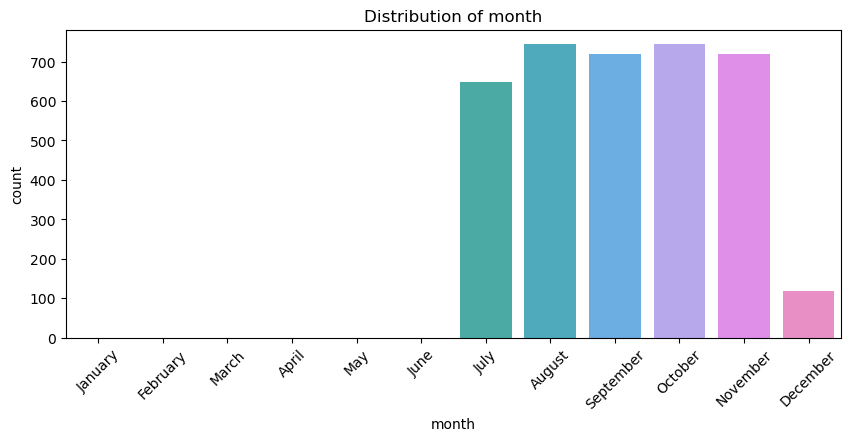

/Users/hassan/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


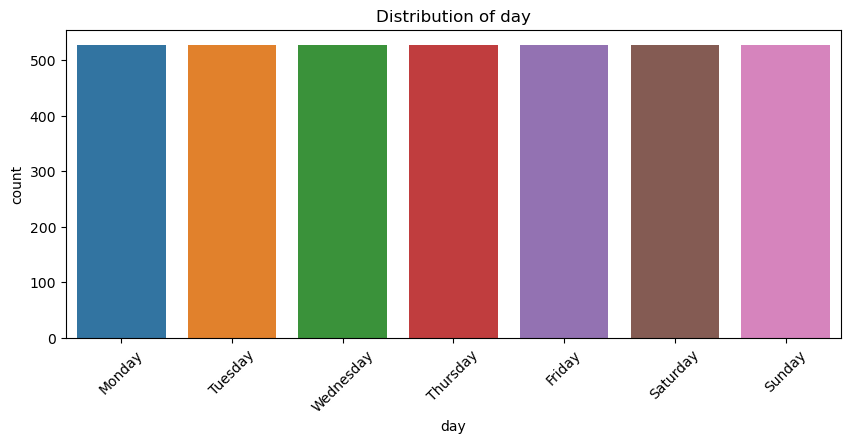

/Users/hassan/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


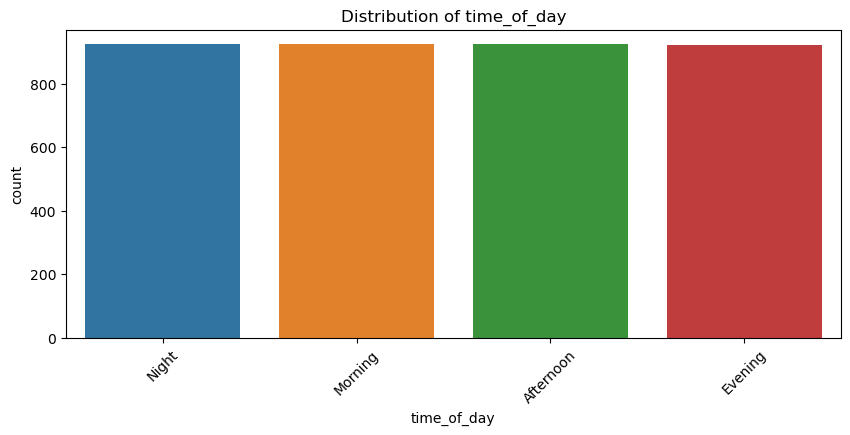

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar charts for each categorical variable
for column in cat_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

### Energy Trends

/Users/hassan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/hassan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


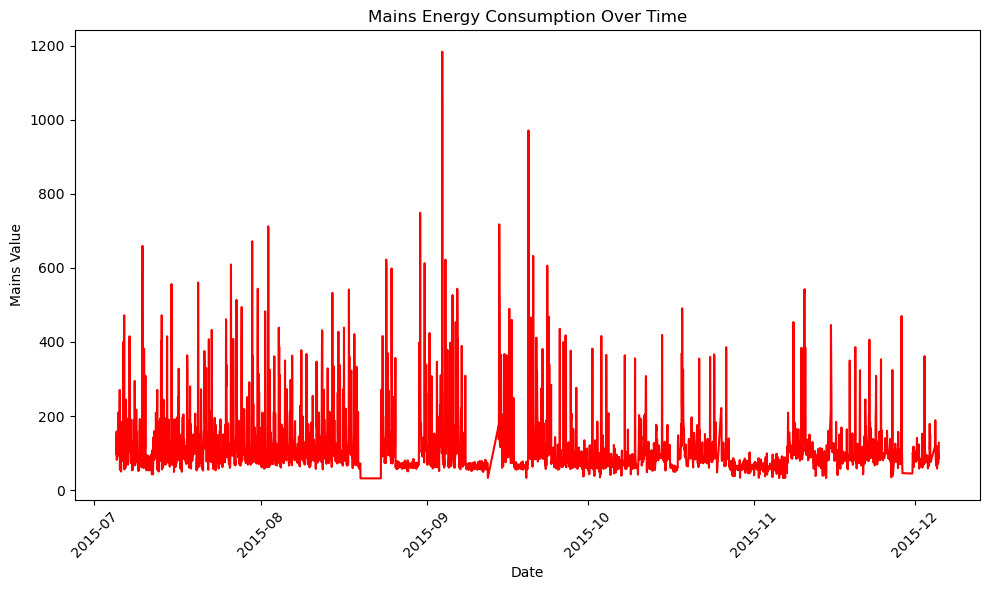

In [13]:
# Plot a line chart for the 'mains' column using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=df.Date, y='mains', data=df, color='red')

# Add titles and labels
plt.title('Mains Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Mains Value')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

/Users/hassan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/hassan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/hassan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/hassan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

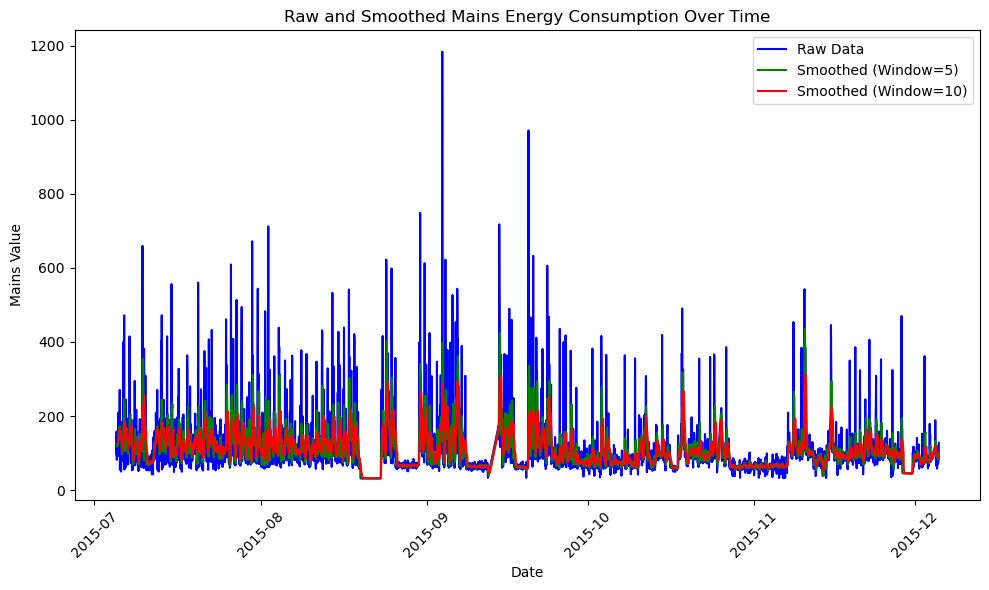

In [14]:
# Apply rolling averages with windows of 10 and 20 time periods
df['mains_smooth_5'] = df['mains'].rolling(window=5).mean()
df['mains_smooth_10'] = df['mains'].rolling(window=10).mean()

# Plot the raw data, smoothed data with window 10, and smoothed data with window 20
plt.figure(figsize=(10, 6))

# Plot raw data
sns.lineplot(x=df.Date, y='mains', data=df, label='Raw Data', color='blue')

# Plot smoothed data (window=10)
sns.lineplot(x=df.Date, y='mains_smooth_5', data=df, label='Smoothed (Window=5)', color='green')

# Plot smoothed data (window=20)
sns.lineplot(x=df.Date, y='mains_smooth_10', data=df, label='Smoothed (Window=10)', color='red')

# Add titles and labels
plt.title('Raw and Smoothed Mains Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Mains Value')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

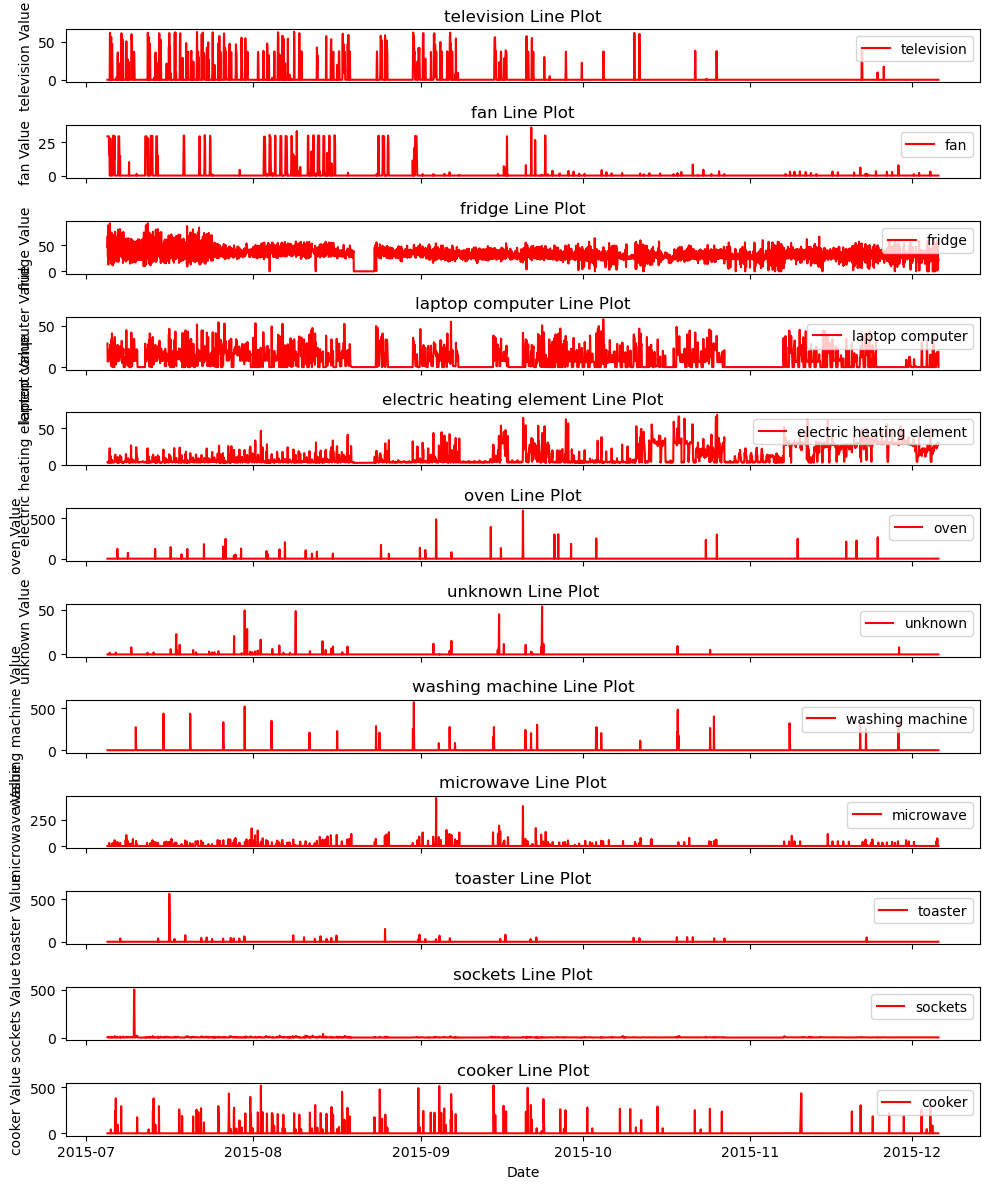

In [15]:
import matplotlib.pyplot as plt

# Select only the numerical columns for plotting
appliance_cols = ['television', 'fan', 'fridge', 'laptop computer',
       'electric heating element', 'oven', 'unknown', 'washing machine',
       'microwave', 'toaster', 'sockets', 'cooker']

# Create subplots with each variable in a different row
fig, axs = plt.subplots(len(appliance_cols), 1, figsize=(10, 1 * len(appliance_cols)), sharex=True)

# Loop through each numerical column and create a line plot in a different subplot
for i, col in enumerate(appliance_cols):
    axs[i].plot(df.Date, df[col], label=col, color='red')  # Customize the color as desired
    axs[i].set_title(f'{col} Line Plot')
    axs[i].set_ylabel(f'{col} Value')
    axs[i].legend(loc='upper right')

# Set a common x-axis label
plt.xlabel('Date')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

### Heatmap

/var/folders/lh/gk9hwg6n1w987hgh2bk78rb00000gn/T/ipykernel_31724/3266020654.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_heatmap = df.groupby('month')[appliance_cols].sum()


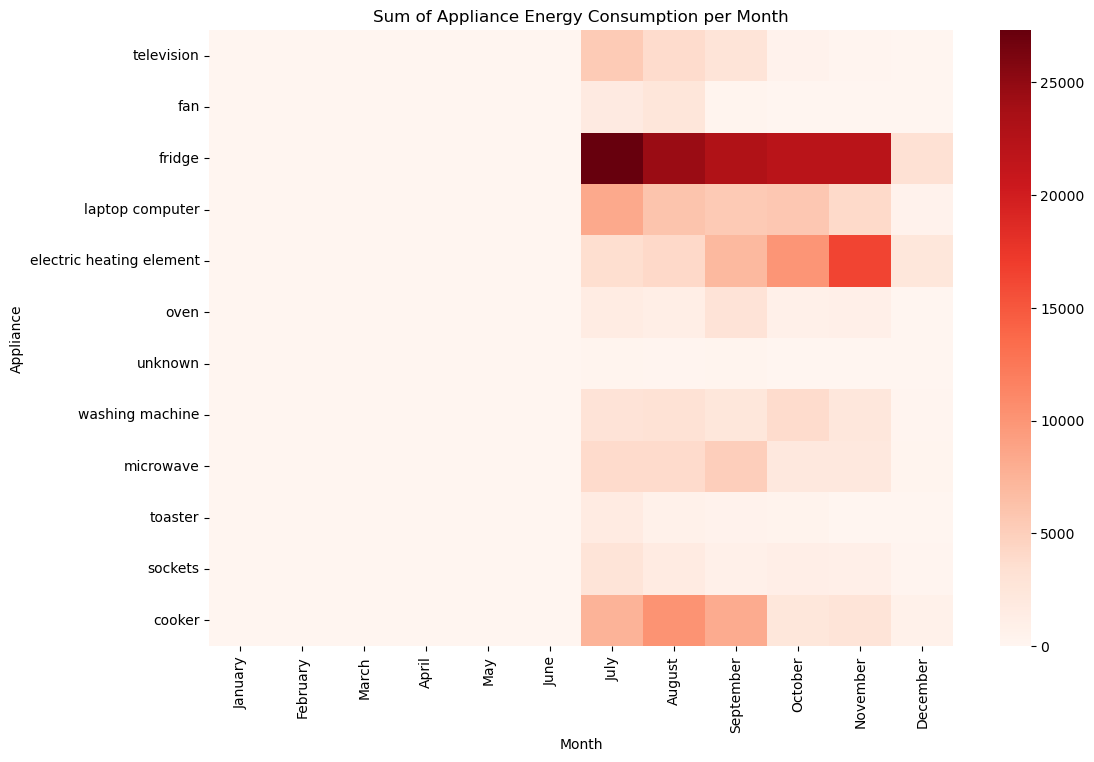

In [16]:
# Group by month and sum values for each appliance
df_heatmap = df.groupby('month')[appliance_cols].sum()

# Transpose the DataFrame so appliances are on the y-axis and months are on the x-axis
df_heatmap_t = df_heatmap.T

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_heatmap_t, cmap='Reds', annot=False, fmt='.1f')

# Add titles and labels
plt.title('Sum of Appliance Energy Consumption per Month')
plt.xlabel('Month')
plt.ylabel('Appliance')

# Show the plot
plt.show()

/var/folders/lh/gk9hwg6n1w987hgh2bk78rb00000gn/T/ipykernel_31724/2612150557.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_heatmap = df.groupby('time_of_day')[appliance_cols].sum()


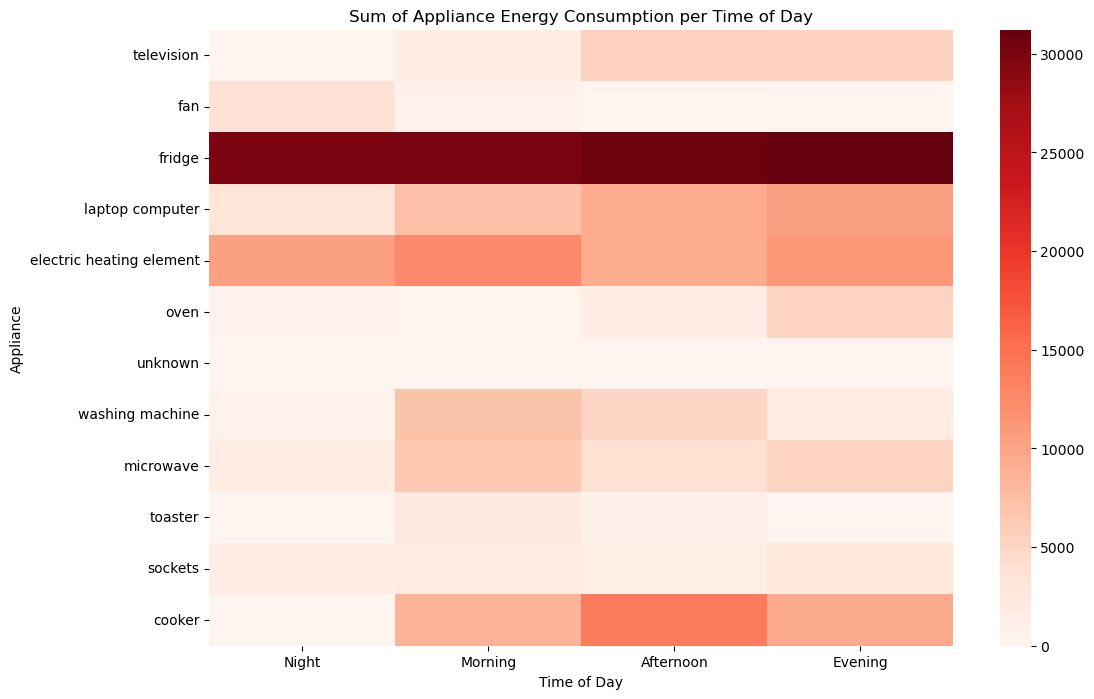

In [17]:
# Group by month and sum values for each appliance
df_heatmap = df.groupby('time_of_day')[appliance_cols].sum()

# Transpose the DataFrame so appliances are on the y-axis and months are on the x-axis
df_heatmap_t = df_heatmap.T

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_heatmap_t, cmap='Reds', annot=False, fmt='.1f')

# Add titles and labels
plt.title('Sum of Appliance Energy Consumption per Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Appliance')

# Show the plot
plt.show()

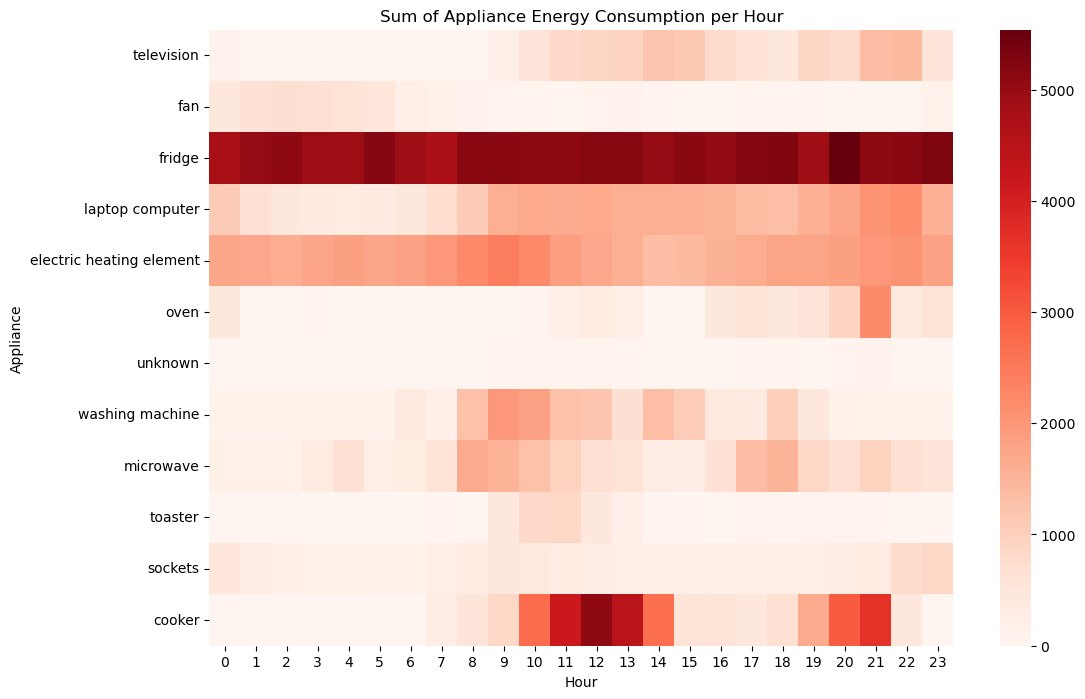

In [18]:
# Group by month and sum values for each appliance
df_heatmap = df.groupby('hour')[appliance_cols].sum()

# Transpose the DataFrame so appliances are on the y-axis and months are on the x-axis
df_heatmap_t = df_heatmap.T

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_heatmap_t, cmap='Reds', annot=False, fmt='.1f')

# Add titles and labels
plt.title('Sum of Appliance Energy Consumption per Hour')
plt.xlabel('Hour')
plt.ylabel('Appliance')

# Show the plot
plt.show()

### Data Distribution 

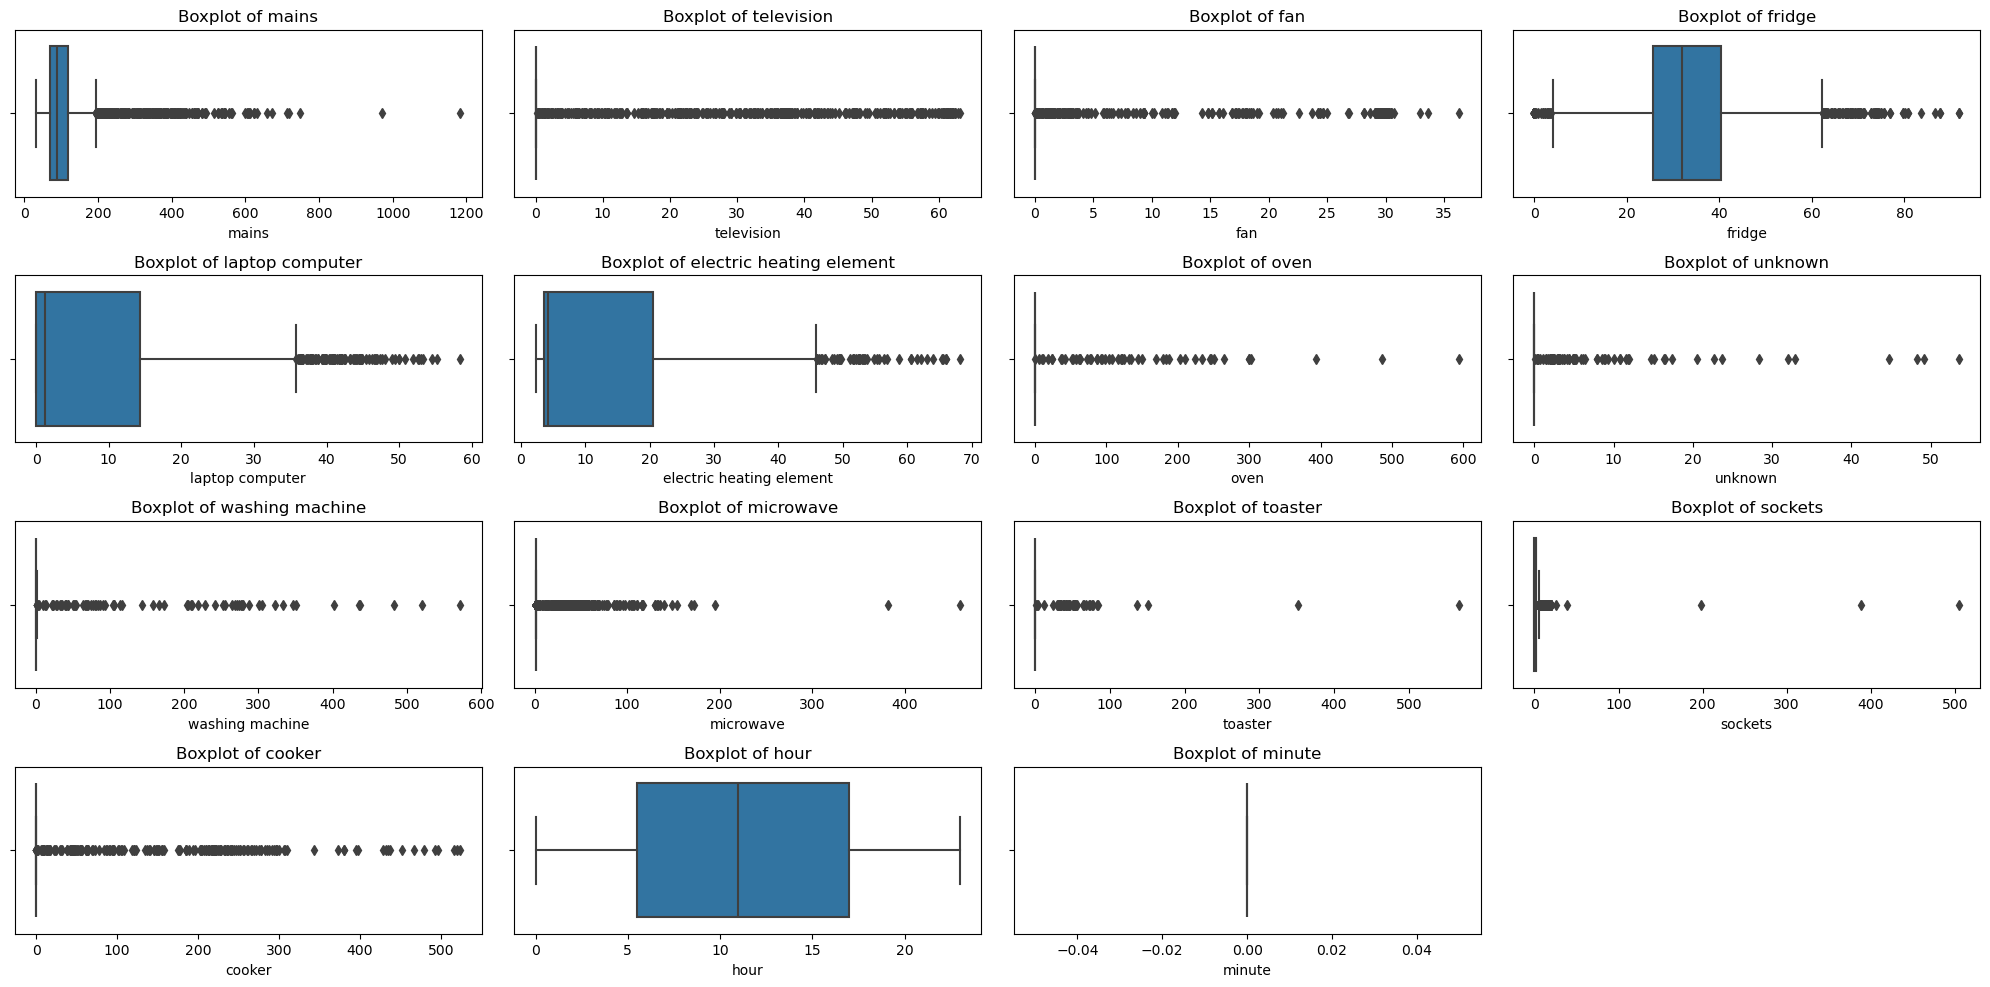

In [19]:
plt.figure(figsize=(20, 12))

# Loop through each numerical column and create a box plot in a subplot
for i, column in enumerate(num_cols):
    if column in df.columns:
        plt.subplot(5, 4, i + 1)  # Change the subplot layout based on your number of numerical columns
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

### Clustering

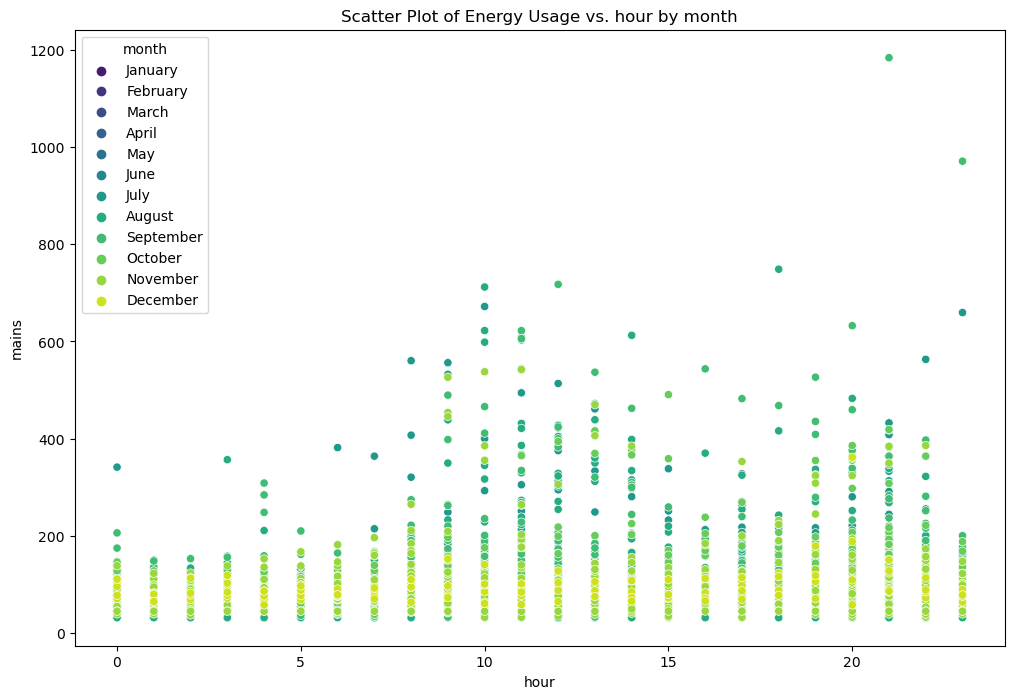

In [20]:
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=df, x='hour', y='mains', hue='month',
                          palette='viridis')  # Adjust size and palette as needed

plt.title('Scatter Plot of Energy Usage vs. hour by month')
plt.show()

### Clustering

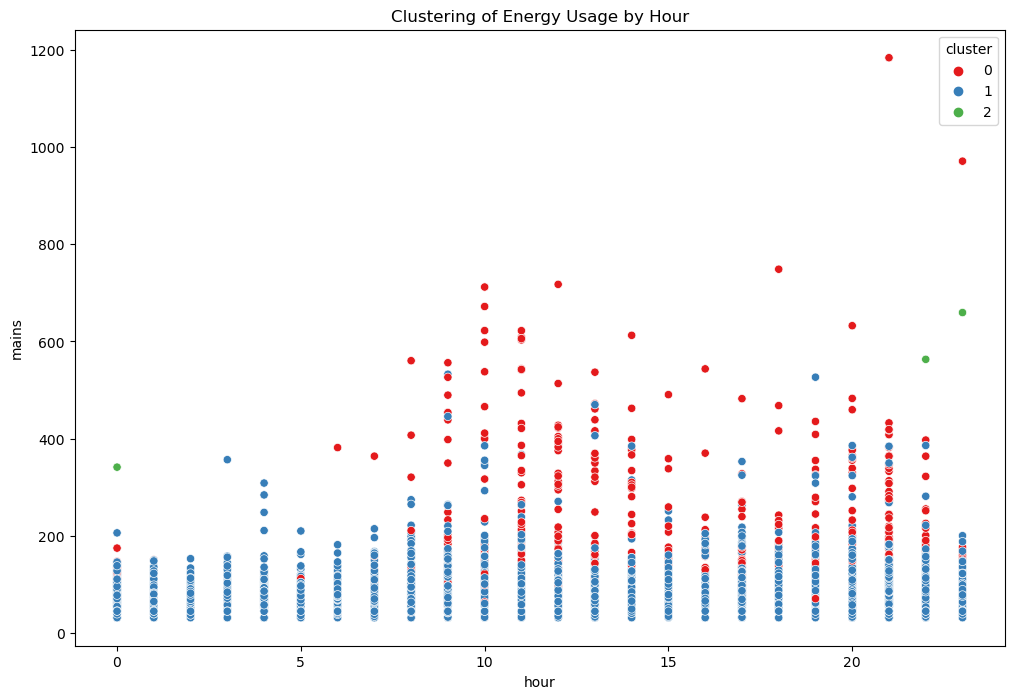

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select numerical columns related to appliance energy usage
appliances = df[appliance_cols]

# Standardize the data
scaler = StandardScaler()
appliances_scaled = scaler.fit_transform(appliances)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(appliances_scaled)

# Visualize the clustering
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='hour', y='mains', hue='cluster', palette='Set1')
plt.title('Clustering of Energy Usage by Hour')
plt.show()

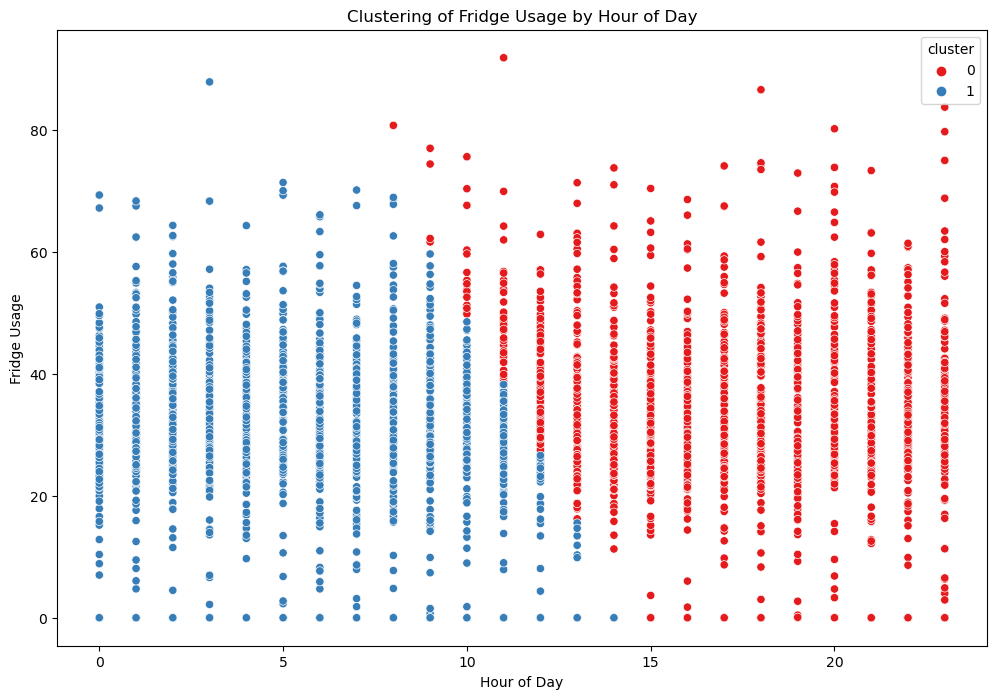

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the 'fridge' and 'hour' columns
fridge_hour_df = df[['hour', 'fridge']].dropna()


# Standardize the data (normalize 'fridge' and 'hour' columns)
scaler = StandardScaler()
fridge_hour_scaled = scaler.fit_transform(fridge_hour_df)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42, )
fridge_hour_df['cluster'] = kmeans.fit_predict(fridge_hour_scaled)

# Visualize the clustering
plt.figure(figsize=(12, 8))
sns.scatterplot(data=fridge_hour_df, x='hour', y='fridge', hue='cluster', palette='Set1')
plt.title('Clustering of Fridge Usage by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fridge Usage')
plt.show()

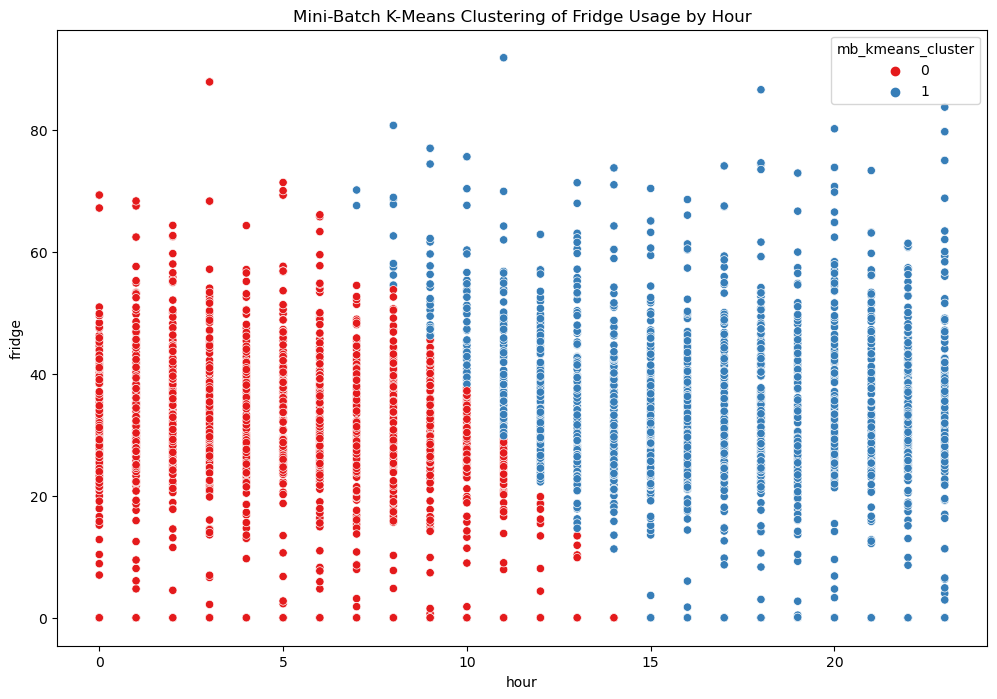

In [33]:
from sklearn.cluster import MiniBatchKMeans

# Apply Mini-Batch K-Means
mb_kmeans = MiniBatchKMeans(n_clusters=2, random_state=42, batch_size=200)
fridge_hour_df['mb_kmeans_cluster'] = mb_kmeans.fit_predict(fridge_hour_scaled)

# Visualize the Mini-Batch K-Means results
plt.figure(figsize=(12, 8))
sns.scatterplot(x='hour', y='fridge', hue='mb_kmeans_cluster', data=fridge_hour_df, palette='Set1')
plt.title('Mini-Batch K-Means Clustering of Fridge Usage by Hour')
plt.show()

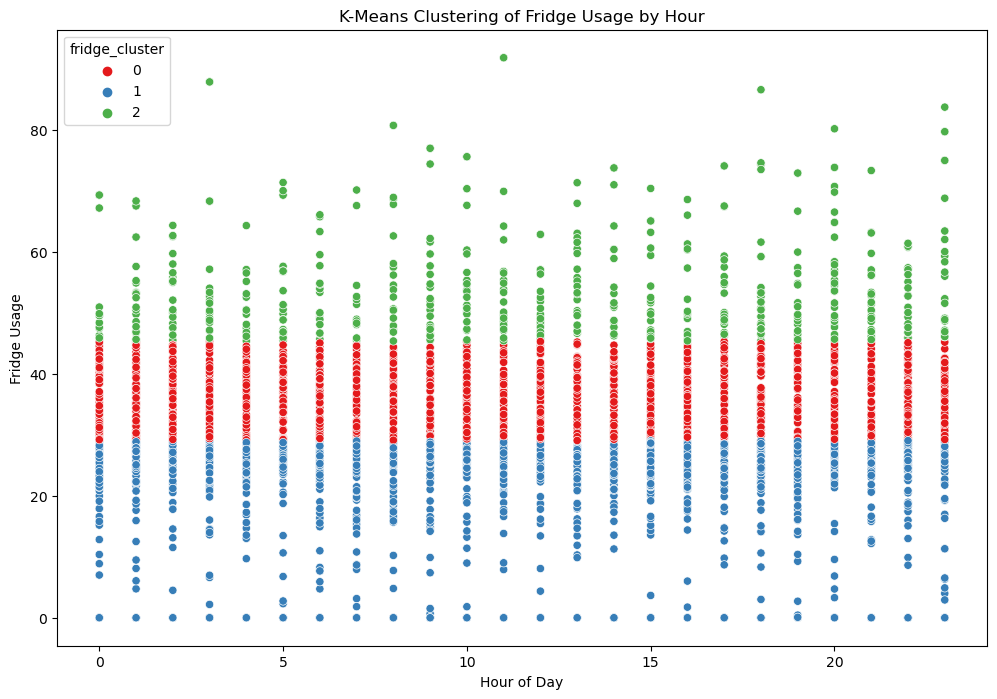

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Select the 'fridge' column for clustering (we are focusing clustering on fridge usage)
fridge_usage_df = fridge_hour_df[['fridge']].dropna()

# Standardize the 'fridge' usage values for clustering
scaler = StandardScaler()
fridge_scaled = scaler.fit_transform(fridge_usage_df)

# Apply K-Means clustering based only on 'fridge' usage
kmeans = KMeans(n_clusters=3, random_state=42)
fridge_hour_df['fridge_cluster'] = kmeans.fit_predict(fridge_scaled)

# Visualize the clustering (fridge usage vs hour)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='hour', y='fridge', hue='fridge_cluster', data=fridge_hour_df, palette='Set1')

# Add labels and title
plt.title('K-Means Clustering of Fridge Usage by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Fridge Usage')

# Show the plot
plt.show()

In [37]:
## Outlier Detection

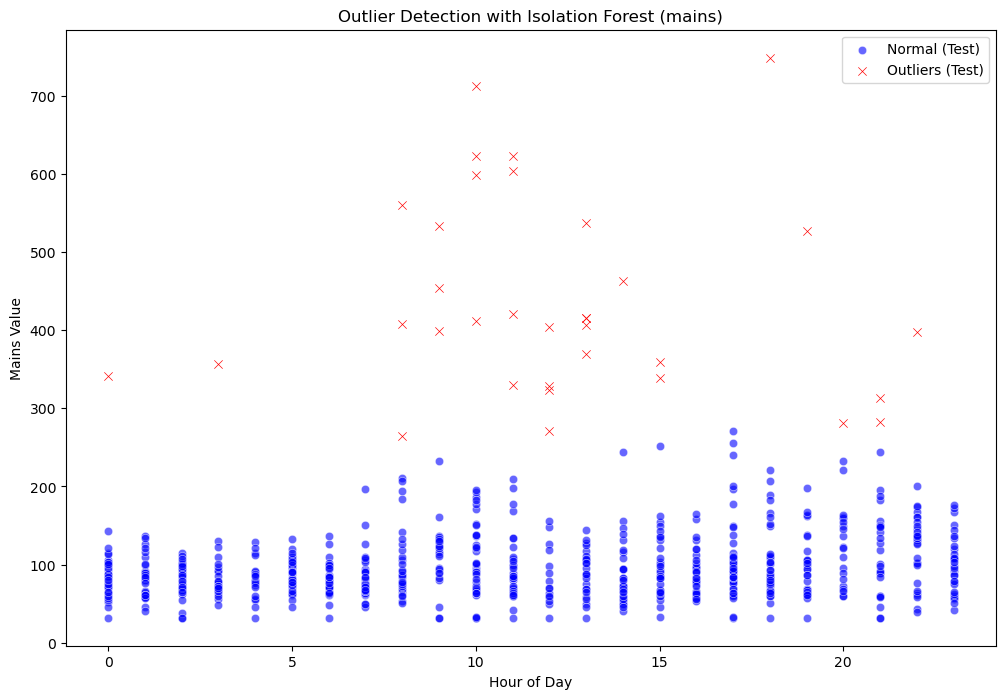

In [47]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Function to perform outlier detection using Isolation Forest on a specified column
def detect_outliers(df, column, contamination=0.05, test_size=0.2, random_state=42):
    # Drop missing values for the selected column
    df_col = df[[column]].dropna()

    # Split the data into training and testing sets
    X_train, X_test = train_test_split(df_col, test_size=test_size, random_state=random_state)

    # Initialize Isolation Forest
    iso_forest = IsolationForest(contamination=contamination, random_state=random_state)

    # Fit the model on the training data
    iso_forest.fit(X_train)

    # Predict on both training and test sets
    X_train['anomaly'] = iso_forest.predict(X_train)
    X_test['anomaly'] = iso_forest.predict(X_test)

    # Isolation Forest assigns -1 to outliers and 1 to inliers
    train_outliers = X_train[X_train['anomaly'] == -1]
    train_inliers = X_train[X_train['anomaly'] == 1]
    test_outliers = X_test[X_test['anomaly'] == -1]
    test_inliers = X_test[X_test['anomaly'] == 1]

    # Visualize results for the test set: Selected column's values (y-axis) vs hour (x-axis)
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x=df.loc[test_inliers.index, 'hour'], y=test_inliers[column], label='Normal (Test)', color='blue', alpha=0.6)
    sns.scatterplot(x=df.loc[test_outliers.index, 'hour'], y=test_outliers[column], label='Outliers (Test)', color='red', marker='x')

    # Add titles and labels
    plt.title(f'Outlier Detection with Isolation Forest ({column})')
    plt.xlabel('Hour of Day')
    plt.ylabel(f'{column.capitalize()} Value')
    plt.legend()

    # Show the plot
    plt.show()

# Example usage:
# Specify the column of interest, e.g., 'mains', 'fridge', 'television'
detect_outliers(df, column='mains')

## monthly bill prediction 

In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to prepare the data
def prepare_data(df, column='mains', start_train_month='June', end_train_month='July', test_month='November'):
    # Filter data for training (June to July) and testing (November)
    train_data = df[df['month'].isin([start_train_month, end_train_month])]
    test_data = df[df['month'] == test_month]

    # Prepare the features (X) and target (y)
    X_train = np.arange(len(train_data)).reshape(-1, 1)
    y_train = train_data[column].values

    X_test = np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1)
    y_test = test_data[column].values

    return X_train, y_train, X_test, y_test, train_data, test_data

# Custom accuracy function for regression
def accuracy(y_true, y_pred):
    return 100 - np.mean(100 * (np.abs(y_pred - y_true) / y_true))

# Function to evaluate models on both train and test sets
def evaluate_models(X_train, y_train, X_test, y_test, train_data, test_data, column):
    # Initialize regression models
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(random_state=42),
        'XGBoost': XGBRegressor(random_state=42)
    }

    # List to store the results for each model
    results = []

    # Train and evaluate each model
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Predict on train set
        y_train_pred = model.predict(X_train)
        
        # Predict on test set
        y_test_pred = model.predict(X_test)

        # Calculate evaluation metrics for train set
        mae_train = mean_absolute_error(y_train, y_train_pred)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        #r2_train = r2_score(y_train, y_train_pred)
        accuracy_train = accuracy(y_train, y_train_pred)

        # Calculate evaluation metrics for test set
        mae_test = mean_absolute_error(y_test, y_test_pred)
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
        #r2_test = r2_score(y_test, y_test_pred)
        accuracy_test = accuracy(y_test, y_test_pred)

        # Store the results in a dictionary for both train and test sets
        results.append({
            'Model': model_name,
            'Train_MAE': mae_train,
            'Train_RMSE': rmse_train,
            #'Train_R2': r2_train,
            'Train_Accuracy (%)': accuracy_train,
            'Test_MAE': mae_test,
            'Test_RMSE': rmse_test,
            #'Test_R2': r2_test,
            'Test_Accuracy (%)': accuracy_test,
            'Predicted_Total_Test': y_test_pred.sum(),
            'Actual_Total_Test': y_test.sum()
        })

    # Convert the results list into a DataFrame
    ML_result_df = pd.DataFrame(results)

    return ML_result_df

In [74]:

# Assuming df has been preprocessed and includes 'Date_only', 'month', and 'mains' (energy data)
X_train, y_train, X_test, y_test, train_data, test_data = prepare_data(df, column='mains', start_train_month='June', end_train_month='July', test_month='November')

# Evaluate the models and combine results​⬤
ML_result_df = evaluate_models(X_train, y_train, X_test, y_test, train_data, test_data, column='mains')

# Show the results
display(ML_result_df.round(2))

,Model,Train_MAE,Train_RMSE,Train_Accuracy (%),Test_MAE,Test_RMSE,Test_Accuracy (%),Predicted_Total_Test,Actual_Total_Test
0,Linear Regression,54.52,85.98,54.89,64.74,76.93,13.37,104739.82,70173.3
1,Random Forest,19.50,32.36,85.06,44.90,64.25,42.08,86319.31,70173.3
2,XGBoost,36.12,60.22,72.27,49.48,66.74,35.19,90895.34,70173.3
